# Aula 05 - Pandas (Parte II)

Na aula passada, iniciamos nosso estudo da biblioteca **pandas**.

Alguns dos principais pontos que vimos, foram:
- o **elemento básico** da biblioteca *pandas* é o objeto *pandas.Series*. Este, por sua vez, é estruturado a partir dos **arrays** de *numpy*;
- um **pandas.DataFrame** é um objeto que engloba um conjunto de *pandas.Series*;
- geralmente, associaremos cada coluna no nosso conjunto de dados a uma série do pandas, e cada linha do DataFrame representará uma observação;
- existem funções muito úteis para manipular conjuntos de dados e obter métricas de agregação a partir deles.

Nesta aula, iremos continuar nosso estudo enfocando algumas outras funções bastante importantes para o pandas.

Vamos trabalhar, por agora, sobre um dataset com casos de covid.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../Datasets/covid_dataset.csv")

In [4]:
df.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png


In [5]:
# Como faço para visualizar apenas as colunas do dataframe?
df.columns

Index(['province', 'country', 'latitude', 'longitude', 'confirmed_cases',
       'deaths', 'recovered', 'update_time', 'data_source', 'country_code',
       'region', 'country_flag'],
      dtype='object')

In [6]:
# Visualizar tamanho do dataframe
df.shape

(24791, 12)

In [25]:
# Como faço para descobrir qual o intervalo de datas considerado?
df['update_time'].unique()

array(['2020-01-24 14:55:00', '2020-01-25 17:05:00',
       '2020-01-25 03:16:00', ..., '3/11/2020 23:13', '3/11/2020 23:33',
       '3/11/2020 23:53'], dtype=object)

In [26]:
for i in df['update_time'].unique():
    print(i)

2020-01-24 14:55:00
2020-01-25 17:05:00
2020-01-25 03:16:00
2020-01-25 05:20:00
2020-01-25 04:58:00
2020-01-26 13:24:00
2020-01-26 16:14:00
2020-01-27 15:34:00
2020-01-27 18:54:00
2020-01-27 20:10:00
2020-01-27 03:18:00
2020-01-28 02:20:00
2020-01-28 06:33:00
2020-01-29 17:40:00
2020-01-30 12:35:00
2020-01-30 00:27:00
2020-01-30 04:51:00
2020-01-31 16:32:00
2020-01-31 21:30:00
2020-01-31 07:29:00
2020-02-01 20:42:00
2020-02-01 01:53:00
2020-02-01 03:31:00
2020-02-02 15:21:00
2020-02-02 17:40:00
2020-02-03 00:48:00
2020-02-03 21:45:00
2020-02-03 04:02:00
2020-02-04 19:52:00
2020-01-22 09:28:10
2020-01-22 14:23:14
2020-01-22 14:25:14
2020-01-22 16:39:34
2020-01-22 17:11:42
2020-01-22 17:32:49
2020-01-22 19:06:15
2020-01-22 19:07:16
2020-01-22 20:40:44
2020-01-22 20:41:44
2020-01-22 21:21:55
2020-01-22 22:46:21
2020-01-22 22:47:22
2020-01-22 22:48:22
2020-01-22 23:28:34
2020-01-23 00:19:49
2020-01-23 00:26:51
2020-01-23 00:45:57
2020-01-23 00:48:58
2020-01-23 00:52:59
2020-01-23 00:55:00


In [9]:
print(df['update_time'].min())
print(df['update_time'].max())

1/22/2020 17:00
3/9/2020 9:53


In [12]:
df.dtypes

province            object
country             object
latitude           float64
longitude          float64
confirmed_cases      int64
deaths             float64
recovered          float64
update_time         object
data_source         object
country_code        object
region              object
country_flag        object
dtype: object

In [13]:
print(type(df['update_time'][0]))

<class 'str'>


### Formatando datas em Pandas: *datetime*

Uma das maneiras de lidarmos com datas em Pandas é utilizar o formato *datetime*: [pandas.to_datetime().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [15]:
print(type(df['update_time'][0])) # tipo original do dado
print(type(pd.to_datetime(df['update_time'][0]))) # tipo de dado após conversão para datetime

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
# Criar uma coluna em Timestamp
df['date'] = pd.to_datetime(df['update_time'])

In [19]:
print(df['date'].min())
print(df['date'].max())

2020-01-22 09:28:10
2020-03-11 23:53:00


Repare, acima, que estamos lidando com objetos diferentes, apesar de trazerem a mesma informação.

A conversão com a função "to_datetime()" transforma o dado original em um objeto do tipo **Timestamp**.

Vamos criar uma nova coluna que replica a informação original, mas em formato de data, e adicioná-la ao nosso DataFrame?

In [17]:
df

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag,date
0,Hubei,China,35.861660,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
1,Guangdong,China,35.861660,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
2,Zhejiang,China,35.861660,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
3,Beijing,China,35.861660,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
4,Chongqing,China,35.861660,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24786,Nebraska,US,37.090240,-95.712891,5,0.0,0.0,3/11/2020 23:13,jhu,USA,Americas,https://www.countryflags.io/us/flat/64.png,2020-03-11 23:13:00
24787,NaN,Reunion,NaN,NaN,1,0.0,0.0,3/11/2020 23:13,jhu,NaN,NaN,NaN,2020-03-11 23:13:00
24788,NaN,Cote d'Ivoire,NaN,NaN,1,0.0,0.0,3/11/2020 23:33,jhu,CIV,Africa,https://www.countryflags.io/ci/flat/64.png,2020-03-11 23:33:00
24789,NaN,Greece,39.074208,21.824312,99,1.0,0.0,3/11/2020 23:53,jhu,GRC,Europe,https://www.countryflags.io/gr/flat/64.png,2020-03-11 23:53:00


E se quisermos formatar essa data?

In [20]:
df.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag,date
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00


In [21]:
df['date_2'] = df['date'].dt.strftime('%d/%m/%Y')
df[['update_time', 'date', 'date_2']]

,update_time,date,date_2
0,2020-01-24 14:55:00,2020-01-24 14:55:00,24/01/2020
1,2020-01-24 14:55:00,2020-01-24 14:55:00,24/01/2020
2,2020-01-24 14:55:00,2020-01-24 14:55:00,24/01/2020
3,2020-01-24 14:55:00,2020-01-24 14:55:00,24/01/2020
4,2020-01-24 14:55:00,2020-01-24 14:55:00,24/01/2020
...,...,...,...
24786,3/11/2020 23:13,2020-03-11 23:13:00,11/03/2020
24787,3/11/2020 23:13,2020-03-11 23:13:00,11/03/2020
24788,3/11/2020 23:33,2020-03-11 23:33:00,11/03/2020
24789,3/11/2020 23:53,2020-03-11 23:53:00,11/03/2020


In [23]:
# Cuidado com os mínimos e máximos ao lidar com strings
print(df['date_2'].min())
print(df['date_2'].max())

01/02/2020
31/01/2020


### Agrupando dados em Pandas

Muitas vezes, estaremos interessados em avaliar alguma agregação dos nossos dados segundo um determinado critério. Para isso, utilizaremos funções como a [.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) e [.agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

Quantos casos totais por dia havia no nosso dataset?

In [28]:
df.groupby("date_2")['confirmed_cases'].agg('sum')

date_2
01/02/2020     453874
01/03/2020      87613
02/02/2020     519879
02/03/2020      91481
03/02/2020     643346
03/03/2020      94702
04/02/2020     603125
04/03/2020      93966
05/02/2020     747393
05/03/2020      97461
06/02/2020     982624
06/03/2020     106264
07/02/2020     926036
07/03/2020     105057
08/02/2020    1048926
08/03/2020     113831
09/02/2020     926299
09/03/2020     108040
10/02/2020    1073430
10/03/2020     114303
11/02/2020     934753
11/03/2020     125681
12/02/2020     263310
13/02/2020     105401
14/02/2020      66634
15/02/2020      69112
16/02/2020      71197
17/02/2020      73273
18/02/2020      75029
19/02/2020      75634
20/02/2020      77227
21/02/2020      76959
22/01/2020       6039
22/02/2020      77612
23/01/2020      17386
23/02/2020      80435
24/01/2020      31581
24/02/2020      78714
25/01/2020      24130
25/02/2020      79768
26/01/2020      21644
26/02/2020      82246
27/01/2020      29555
27/02/2020      82524
28/01/2020     106933
28/

O resultado acima pode ser mais facilmente visualizado se usarmos a função **.plot()** do pandas.

In [29]:
new_cases = df\
    .groupby("date_2")\
    ['confirmed_cases']\
    .agg('sum')

<AxesSubplot: xlabel='date_2'>

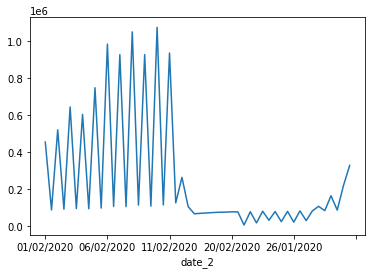

In [30]:
new_cases.plot()

Repare que a ordenação das datas no gráfico acima **não está como esperaríamos!!**. 

Isso acontece porque a função .groupby() está, por padrão, ordenando **as strings**, mas está ordenação não necessariamente corresponderá à ordem real das datas!

Como podemos solucionar isso?

In [31]:
df['Observation Date'] = pd.to_datetime(df['date_2'], format = '%d/%m/%Y')

In [32]:
df['Observation Date']

0       2020-01-24
1       2020-01-24
2       2020-01-24
3       2020-01-24
4       2020-01-24
           ...    
24786   2020-03-11
24787   2020-03-11
24788   2020-03-11
24789   2020-03-11
24790   2020-03-11
Name: Observation Date, Length: 24791, dtype: datetime64[ns]

In [33]:
df.groupby("Observation Date")['confirmed_cases'].sum()

Observation Date
2020-01-22       6039
2020-01-23      17386
2020-01-24      31581
2020-01-25      24130
2020-01-26      21644
2020-01-27      29555
2020-01-28     106933
2020-01-29     164057
2020-01-30     218724
2020-01-31     327826
2020-02-01     453874
2020-02-02     519879
2020-02-03     643346
2020-02-04     603125
2020-02-05     747393
2020-02-06     982624
2020-02-07     926036
2020-02-08    1048926
2020-02-09     926299
2020-02-10    1073430
2020-02-11     934753
2020-02-12     263310
2020-02-13     105401
2020-02-14      66634
2020-02-15      69112
2020-02-16      71197
2020-02-17      73273
2020-02-18      75029
2020-02-19      75634
2020-02-20      77227
2020-02-21      76959
2020-02-22      77612
2020-02-23      80435
2020-02-24      78714
2020-02-25      79768
2020-02-26      82246
2020-02-27      82524
2020-02-28      83702
2020-02-29      86502
2020-03-01      87613
2020-03-02      91481
2020-03-03      94702
2020-03-04      93966
2020-03-05      97461
2020-03-06     

<AxesSubplot: xlabel='Observation Date'>

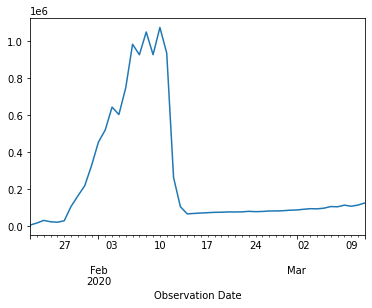

In [34]:
df.groupby("Observation Date")['confirmed_cases'].sum().plot()

Se quisermos, podemos excluir do nosso DataFrame outras colunas de data que não mais utilizaremos com a função [.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [37]:
df.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag,date,date_2,Observation Date
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00,24/01/2020,2020-01-24
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00,24/01/2020,2020-01-24
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00,24/01/2020,2020-01-24
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00,24/01/2020,2020-01-24
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24 14:55:00,24/01/2020,2020-01-24


In [38]:
df.drop(labels = ['update_time', 'date', 'date_2'],
       axis = 1)

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,Hubei,China,35.861660,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,Guangdong,China,35.861660,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,Zhejiang,China,35.861660,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,Beijing,China,35.861660,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,Chongqing,China,35.861660,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
24786,Nebraska,US,37.090240,-95.712891,5,0.0,0.0,jhu,USA,Americas,https://www.countryflags.io/us/flat/64.png,2020-03-11
24787,NaN,Reunion,NaN,NaN,1,0.0,0.0,jhu,NaN,NaN,NaN,2020-03-11
24788,NaN,Cote d'Ivoire,NaN,NaN,1,0.0,0.0,jhu,CIV,Africa,https://www.countryflags.io/ci/flat/64.png,2020-03-11
24789,NaN,Greece,39.074208,21.824312,99,1.0,0.0,jhu,GRC,Europe,https://www.countryflags.io/gr/flat/64.png,2020-03-11


In [39]:
df.drop(columns = ['update_time', 'date', 'date_2'])

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,Hubei,China,35.861660,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,Guangdong,China,35.861660,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,Zhejiang,China,35.861660,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,Beijing,China,35.861660,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,Chongqing,China,35.861660,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
24786,Nebraska,US,37.090240,-95.712891,5,0.0,0.0,jhu,USA,Americas,https://www.countryflags.io/us/flat/64.png,2020-03-11
24787,NaN,Reunion,NaN,NaN,1,0.0,0.0,jhu,NaN,NaN,NaN,2020-03-11
24788,NaN,Cote d'Ivoire,NaN,NaN,1,0.0,0.0,jhu,CIV,Africa,https://www.countryflags.io/ci/flat/64.png,2020-03-11
24789,NaN,Greece,39.074208,21.824312,99,1.0,0.0,jhu,GRC,Europe,https://www.countryflags.io/gr/flat/64.png,2020-03-11


In [40]:
df.drop(columns = ['update_time', 'date', 'date_2'],
        inplace = True)

In [41]:
df

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,Hubei,China,35.861660,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,Guangdong,China,35.861660,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,Zhejiang,China,35.861660,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,Beijing,China,35.861660,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,Chongqing,China,35.861660,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
24786,Nebraska,US,37.090240,-95.712891,5,0.0,0.0,jhu,USA,Americas,https://www.countryflags.io/us/flat/64.png,2020-03-11
24787,NaN,Reunion,NaN,NaN,1,0.0,0.0,jhu,NaN,NaN,NaN,2020-03-11
24788,NaN,Cote d'Ivoire,NaN,NaN,1,0.0,0.0,jhu,CIV,Africa,https://www.countryflags.io/ci/flat/64.png,2020-03-11
24789,NaN,Greece,39.074208,21.824312,99,1.0,0.0,jhu,GRC,Europe,https://www.countryflags.io/gr/flat/64.png,2020-03-11


Vamos verificar o número total de casos por país neste período?

In [42]:
df.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24


In [43]:
df.groupby("country")['confirmed_cases'].agg('sum')

country
 Azerbaijan                         1
Afghanistan                        33
Albania                            24
Algeria                           151
Andorra                            10
                                 ... 
United States                     173
Vatican City                        4
Viet Nam                           31
Vietnam                           750
occupied Palestinian territory     25
Name: confirmed_cases, Length: 140, dtype: int64

In [44]:
df.groupby("country")['confirmed_cases'].agg('sum').sort_values()

country
 Azerbaijan                1
Cote d'Ivoire              1
Ivory Coast                1
Jamaica                    1
Congo (Kinshasa)           1
                      ...   
Others                 17084
Iran                   46164
South Korea            65782
Italy                  66848
China               12255743
Name: confirmed_cases, Length: 140, dtype: int64

In [45]:
df.groupby("country")['confirmed_cases'].agg('sum').sort_values(ascending = False)

country
China               12255743
Italy                  66848
South Korea            65782
Iran                   46164
Others                 17084
                      ...   
Congo (Kinshasa)           1
Jamaica                    1
Ivory Coast                1
Cote d'Ivoire              1
 Azerbaijan                1
Name: confirmed_cases, Length: 140, dtype: int64

<AxesSubplot: ylabel='country'>

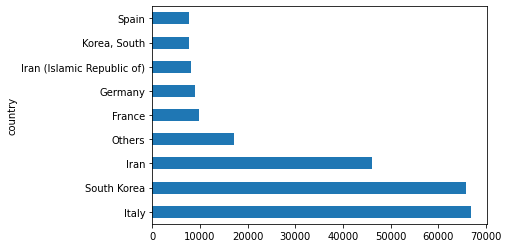

In [48]:
df.groupby("country")['confirmed_cases'].agg('sum').sort_values(ascending = False)[1:10].plot(kind = 'barh')

Vamos verificar a razão entre o número total de recuperados e de casos confirmados, por dia, na Itália?

In [49]:
df.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24


In [50]:
# Filtrando o dataframe
df_italy = df[df['country'] == "Italy"].copy()

In [51]:
df_italy.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
823,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
881,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
938,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
995,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-02-01
1051,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-02-01


In [53]:
df_italy.tail()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
24013,NaN,Italy,41.87194,12.56738,5883,233.0,589.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-07
24230,NaN,Italy,41.87194,12.56738,7375,366.0,622.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-08
24406,NaN,Italy,41.87194,12.56738,9172,463.0,724.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-09
24579,NaN,Italy,41.87194,12.56738,10149,631.0,724.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-10
24741,NaN,Italy,41.87194,12.56738,12462,827.0,1045.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-11


<AxesSubplot: >

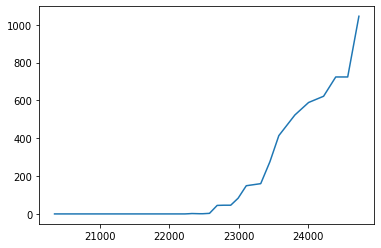

In [52]:
df_italy['recovered'].plot()

Repare que na coluna "recovered" temos alguns valores 'NaN'. Neste caso, podemos preenchê-los com '0', por exemplo, e assim estaremos assumindo que, quando tivermos dados faltantes em relação ao número de pacientes que se recuperaram da COVID-19, esta situação será equivalente a não termos pacientes recuperados naquele dia.

In [55]:
df_italy.loc[:,'recovered'].fillna(value = 0,
                             inplace = True)

In [57]:
df_italy.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
823,NaN,Italy,41.87194,12.56738,2,0.0,0.0,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
881,NaN,Italy,41.87194,12.56738,2,0.0,0.0,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
938,NaN,Italy,41.87194,12.56738,2,0.0,0.0,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
995,NaN,Italy,41.87194,12.56738,2,0.0,0.0,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-02-01
1051,NaN,Italy,41.87194,12.56738,2,0.0,0.0,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-02-01


In [58]:
df_italy.groupby("Observation Date")[['confirmed_cases', 'recovered']].agg('sum')

,confirmed_cases,recovered
Observation Date,,
2020-01-31,20,0.0
2020-02-01,6,0.0
2020-02-02,4,0.0
2020-02-03,6,0.0
2020-02-04,2,0.0
2020-02-07,42,0.0
2020-02-21,20,0.0
2020-02-22,62,1.0
2020-02-23,155,2.0


In [59]:
grouped_df = df_italy.groupby("Observation Date")[['confirmed_cases', 'recovered']].agg('sum')

In [60]:
grouped_df.head()

,confirmed_cases,recovered
Observation Date,,
2020-01-31,20,0.0
2020-02-01,6,0.0
2020-02-02,4,0.0
2020-02-03,6,0.0
2020-02-04,2,0.0


In [61]:
grouped_df['recovered_to_confirmed'] = grouped_df['recovered']/grouped_df['confirmed_cases']

In [62]:
grouped_df

,confirmed_cases,recovered,recovered_to_confirmed
Observation Date,,,
2020-01-31,20,0.0,0.000000
2020-02-01,6,0.0,0.000000
2020-02-02,4,0.0,0.000000
2020-02-03,6,0.0,0.000000
2020-02-04,2,0.0,0.000000
2020-02-07,42,0.0,0.000000
2020-02-21,20,0.0,0.000000
2020-02-22,62,1.0,0.016129
2020-02-23,155,2.0,0.012903


<AxesSubplot: xlabel='Observation Date'>

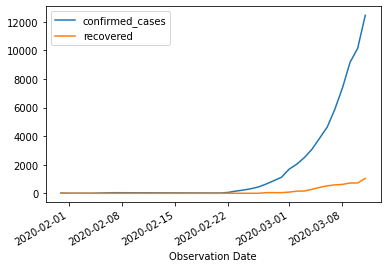

In [65]:
grouped_df[['confirmed_cases', 'recovered']].plot()

<AxesSubplot: xlabel='Observation Date'>

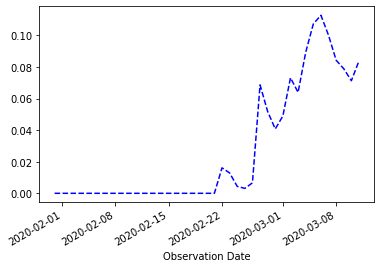

In [78]:
grouped_df['recovered_to_confirmed'].plot(kind = 'line', color = 'b', linestyle = '--')

Além disso, vale notar que temos datas repetidas na coluna *Observation Date*, o que indica dados de várias províncias da Itália (mesmo que não as conheçamos). Vamos somar as datas antes de realizar a operação para encontrar a quantidade que queremos avaliar.

### Juntando diferentes conjuntos de dados com Pandas

Eventualmente, será preciso que formemos um novo conjunto de dados a partir de bases de dados menores. Para isso, poderemos trabalhar com duas funções principais: [.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) e [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).

A função *concat()* nos permite **concatenar** diferentes DataFrames, seja na direção de linhas, seja na direção de colunas.

In [79]:
china_df = pd.read_csv("covid_cases_china.csv")
china_df.head()

,Unnamed: 0,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,0,Hubei,China,35.86166,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,3,Beijing,China,35.86166,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24


In [80]:
china_df.shape

(21057, 13)

In [82]:
italy_df = pd.read_csv("covid_cases_italia.csv")
italy_df.head()

,Unnamed: 0,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,823,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
1,881,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
2,938,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-01-31
3,995,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-02-01
4,1051,NaN,Italy,41.87194,12.56738,2,0.0,NaN,bno,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-02-01


In [83]:
italy_df.shape

(53, 13)

In [84]:
# Concatenando para termos os dois conjuntos de dados em um único dataframe
df_total = pd.concat([china_df, italy_df],
                    axis = 0)

In [85]:
df_total

,Unnamed: 0,province,country,latitude,longitude,confirmed_cases,deaths,recovered,data_source,country_code,region,country_flag,Observation Date
0,0,Hubei,China,35.86166,104.195397,729,39.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
1,1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
2,2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
3,3,Beijing,China,35.86166,104.195397,36,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
4,4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,24013,NaN,Italy,41.87194,12.567380,5883,233.0,589.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-07
49,24230,NaN,Italy,41.87194,12.567380,7375,366.0,622.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-08
50,24406,NaN,Italy,41.87194,12.567380,9172,463.0,724.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-09
51,24579,NaN,Italy,41.87194,12.567380,10149,631.0,724.0,jhu,ITA,Europe,https://www.countryflags.io/it/flat/64.png,2020-03-10


Com a abordagem acima, agora temos ambos os dados no mesmo DataFrame, "empilhados" um sobre o outro. 

Também é possível realizarmos concatenações em colunas, substituindo o argumento "axis = 0" por "axis = 1".

Por outro lado, a função **merge()** funciona muito similarmente ao comando *JOIN* do *SQL*. Esta função permite, assim, cruzarmos dados entre tabelas diferentes, desde que tenhamos chaves em comum.

<img src="https://community.qlik.com/legacyfs/online/87693_all-joins.png" width=450>

Vamos avaliar, por exemplo, uma situação em que não tivéssemos a coluna 'country' no nosso dataframe original. Vamos supor que tenhamos apenas os conjuntos de dados abaixo.

In [86]:
# total de casos e de mortes na China, por dia
df_china = df[df['country'] == 'China']\
    .groupby("Observation Date")\
    [['confirmed_cases', 'deaths']]\
    .sum()

In [88]:
df_china.head()

,confirmed_cases,deaths
Observation Date,,
2020-01-22,6033,140.0
2020-01-23,17377,465.0
2020-01-24,31543,501.0
2020-01-25,23987,758.0
2020-01-26,21530,611.0


In [89]:
# total de casos e de mortes no Brasil, por dia
df_brazil = df[df['country'] == 'Brazil']\
    .groupby("Observation Date")\
    [['confirmed_cases', 'deaths']]\
    .sum()

In [90]:
df_brazil.head()

,confirmed_cases,deaths
Observation Date,,
2020-01-23,0,0.0
2020-02-26,3,0.0
2020-02-29,8,0.0
2020-03-04,8,0.0
2020-03-06,26,0.0


In [91]:
df_total = pd.merge(left = df_china,
                   right = df_brazil,
                   how = 'inner',
                   on = 'Observation Date')

In [92]:
df_total

,confirmed_cases_x,deaths_x,confirmed_cases_y,deaths_y
Observation Date,,,,
2020-01-23,17377,465.0,0,0.0
2020-02-26,78146,2719.0,3,0.0
2020-02-29,79202,2834.0,8,0.0
2020-03-04,80136,2983.0,8,0.0
2020-03-06,82425,3050.0,26,0.0
2020-03-08,85146,3166.0,20,0.0
2020-03-09,77155,3076.0,25,0.0
2020-03-10,77368,3092.0,31,0.0
2020-03-11,80921,3161.0,38,0.0


Por padrão, o *.merge()* atribui o índice "x" ao dataframe da esquerda, e, "y", ao dataframe da direita. Podemos alterar a nomenclatura para algo que faça mais sentido em nossa aplicação.

In [93]:
df_total.rename(mapper = {'confirmed_cases_x': 'Confirmed cases China',
                          'confirmed_cases_y': 'Confirmed cases Brazil',
                          'deaths_x': 'China deaths',
                          'deaths_y': 'Brazil deaths'},
               axis = 1,
               inplace = True)

In [94]:
df_total

,Confirmed cases China,China deaths,Confirmed cases Brazil,Brazil deaths
Observation Date,,,,
2020-01-23,17377,465.0,0,0.0
2020-02-26,78146,2719.0,3,0.0
2020-02-29,79202,2834.0,8,0.0
2020-03-04,80136,2983.0,8,0.0
2020-03-06,82425,3050.0,26,0.0
2020-03-08,85146,3166.0,20,0.0
2020-03-09,77155,3076.0,25,0.0
2020-03-10,77368,3092.0,31,0.0
2020-03-11,80921,3161.0,38,0.0


Temos apenas um conjunto pequeno de datas porque, como fizemos um merge do tipo **inner**, mantemos apenas o que ambos datasets têm em comum. Se quiséssemos manter todas as datas possíveis, teríamos que trabalhar, por exemplo, com um **left** merge.

In [95]:
# Merge equivalente ao "LEFT JOIN" do SQL
df_total = pd.merge(left = df_china,
                   right = df_brazil,
                   how = 'left',
                   on = 'Observation Date')

df_total.rename(mapper = {'confirmed_cases_x': 'Confirmed cases China',
                          'confirmed_cases_y': 'Confirmed cases Brazil',
                          'deaths_x': 'China deaths',
                          'deaths_y': 'Brazil deaths'},
               axis = 1,
               inplace = True)
df_total

,Confirmed cases China,China deaths,Confirmed cases Brazil,Brazil deaths
Observation Date,,,,
2020-01-22,6033,140.0,NaN,NaN
2020-01-23,17377,465.0,0.0,0.0
2020-01-24,31543,501.0,NaN,NaN
2020-01-25,23987,758.0,NaN,NaN
2020-01-26,21530,611.0,NaN,NaN
2020-01-27,29338,810.0,NaN,NaN
2020-01-28,106764,2641.0,NaN,NaN
2020-01-29,163910,3628.0,NaN,NaN
2020-01-30,218377,4839.0,NaN,NaN


In [96]:
df_total.shape

(50, 4)

<AxesSubplot: xlabel='Observation Date'>

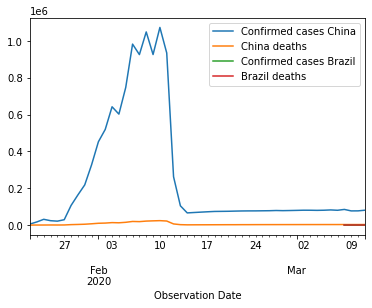

In [97]:
df_total.plot()

### Pivotando dataframes

Em algumas situações, pode ser necessário "pivotar" a tabela de dados que estamos trabalhando. Em outras palavras, talvez tenhamos uma coluna que queiramos transformar em lihas da nossa tabela, por exemplo. Valores únicos da coluna serão usados nestas situações.

A função [**.pivot()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) é a que utilizaremos para obter esse resultado.

In [98]:
df = pd.DataFrame({'Disease': ['COVID', 'COVID', 'COVID', 'Flu', 'Flu', 'Flu'],
                  'Country': ['China', 'Italy', 'Brazil', 'China', 'Italy', 'Brazil'],
                  'Total cases': [20000, 10000, 5000, 1000, 15000, 2300],
                  'Total deaths': [100, 50, 30, 10, 40, 25]
                  })

In [99]:
df

,Disease,Country,Total cases,Total deaths
0,COVID,China,20000,100
1,COVID,Italy,10000,50
2,COVID,Brazil,5000,30
3,Flu,China,1000,10
4,Flu,Italy,15000,40
5,Flu,Brazil,2300,25


In [100]:
df.pivot(index = 'Disease',
        columns = 'Country')

Total cases               Total deaths            
Country      Brazil  China  Italy       Brazil China Italy
Disease                                                   
COVID          5000  20000  10000           30   100    50
Flu            2300   1000  15000           25    10    40

In [101]:
df.pivot(index = 'Country', columns = 'Disease')

Total cases        Total deaths    
Disease       COVID    Flu        COVID Flu
Country                                    
Brazil         5000   2300           30  25
China         20000   1000          100  10
Italy         10000  15000           50  40

Note que a função **pivot()** transforma **informações das colunas do dataset** em índices e/ou novas colunas!

# Voltamos às 20h57

## Vamos praticar?

Em grupos, resolvam os exercícios abaixo. Utilizaremos um [dataset de predição de AVC](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). 

Abra o link e familiarize-se com o dataset por meio de sua descrição. Você pode baixá-lo para abri-lo em seu notebook.

#### Exercício 1

A partir do dataset mencionado acima, escreva uma função que, recebendo-o como entrada, retorne, na forma de prints:
- O número total de valores nulos no dataset, por coluna;
- O número total de pacientes de cada gênero;
- O número total de pacientes maiores de 65 anos de idade;
- O número total de pacientes com doença cardíaca;
- O número total de pacientes que tiveram um AVC.

O trecho de código abaixo exemplifica a entrada e a saída da função.

In [304]:
# leitura do dataset
df = pd.read_csv("../../Datasets/healthcare-dataset-stroke-data.csv")

calculate_exercise_requisites(df)

Contagem de valores nulos por coluna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Número total de pacientes por gênero:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Número total de pacientes com 65 anos de idade ou mais:
1027


Número total de pacientes com doença cardíaca:
276


Número total de pacientes que tiveram um AVC:
249


In [39]:
import pandas as pd
# leitura do dataset
df = pd.read_csv("../../Datasets/healthcare-dataset-stroke-data.csv")

In [7]:
def calculate_exercise_requisites(df):
    print(f"Contagem de valores nulos por coluna:\n{df.isnull().sum()}")
    print("\n")
    print(f"Número total de pacientes por gênero:\n{df['gender'].value_counts()}")
    print("\n")
    print(f"Número total de pacientes com 65 anos de idade ou mais:\n{len(df[df['age'] >= 65])}")
    print("\n")
    print(f"Número total de pacientes com doença cardíaca:\n{len(df[df['heart_disease'] == 1])}")
    print("\n")
    print(f"Número total de pacientes que tiveram AVC:\n{len(df[df['stroke'] == 1])}")

In [8]:
calculate_exercise_requisites(df)

Contagem de valores nulos por coluna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Número total de pacientes por gênero:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Número total de pacientes com 65 anos de idade ou mais:
1027


Número total de pacientes com doença cardíaca:
276


Número total de pacientes que tiveram AVC:
249


#### Exercício 2

Em relação aos valores nulos encontrados no exercício anterior, vocês conseguiriam pensar em maneiras de tratá-los? Implementem uma função que receba o conjunto de dados original e retorne um novo dataframe com os valores tratados segundo a abordagem que vocês proponham.

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.shape

(5110, 12)

In [11]:
# proporção de nulos
201/5110

0.03933463796477495

In [13]:
df.groupby("gender")['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [15]:
df.groupby("gender")['bmi'].median()

gender
Female    27.8
Male      28.4
Other     22.4
Name: bmi, dtype: float64

In [19]:
df[df['gender'] == 'Female']['bmi'].mode()

0    23.4
dtype: float64

In [20]:
df[df['gender'] == 'Male']['bmi'].mode()

0    26.7
dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='Count'>

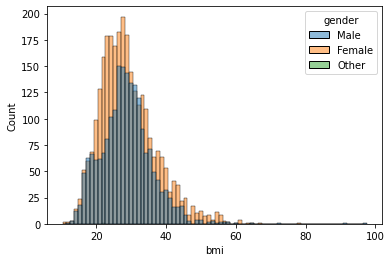

In [27]:
import seaborn as sns
sns.histplot(df, x = 'bmi', hue = 'gender')

In [40]:
# Vamos preencher os valores NaN com a moda
female_mode = df[df['gender'] == 'Female']['bmi'].mode()[0]
male_mode = df[df['gender'] == 'Male']['bmi'].mode()[0]

df2 = df['bmi'][df['gender'] == 'Female'].fillna(value = female_mode)
df2 = df['bmi'][df['gender'] == 'Male'].fillna(value = male_mode)

In [41]:
df2.isnull().sum()

0

In [46]:
type(df[df['gender'] == 'Female']['bmi'].mode())

pandas.core.series.Series

In [47]:
type(df[df['gender'] == 'Female']['bmi'].mode()[0])

numpy.float64

#### Exercício 3

Reproduza as visualizações abaixo, que trazem o número de pacientes que tiveram um AVC pelos diferentes tipos de trabalho.

In [48]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
df.groupby("work_type")['stroke'].sum()

work_type
Govt_job          33
Never_worked       0
Private          149
Self-employed     65
children           2
Name: stroke, dtype: int64

<AxesSubplot: ylabel='stroke'>

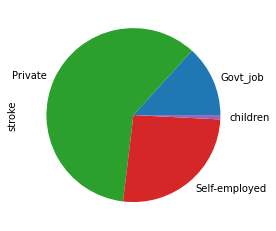

In [50]:
df.groupby("work_type")['stroke'].sum().plot(kind = 'pie')

<AxesSubplot: ylabel='stroke'>

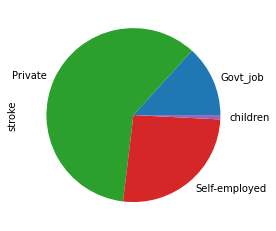

In [55]:
df.groupby("work_type")['stroke'].sum().sort_values(ascending = False)

work_type
Private          149
Self-employed     65
Govt_job          33
children           2
Never_worked       0
Name: stroke, dtype: int64

<AxesSubplot: ylabel='work_type'>

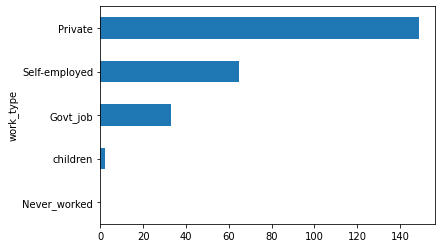

In [53]:
df.groupby("work_type")['stroke'].sum().sort_values().plot(kind = 'barh')

<AxesSubplot: ylabel='work_type'>

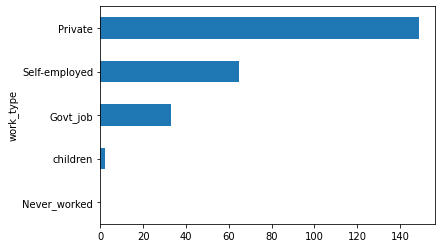

#### Exercício 4

Adicione, ao dataframe, duas novas colunas:
- "glucose_level_qualitative": coluna que traz se o valor de "avg_glucose_level" está "Under Q1" (abaixo do primeiro quartil), "Over Q3" (acima do terceiro quartil) or "Within Q1-Q3" (dentro destes dois pontos);
- "bmi_classification": coluna que classifica o BMI em Underweight (abaixo de 18.5 kg/m²), Normal (18.5 - 24.9), Overweight (25 - 29.9) or Obesity (maior ou igual a 30).

In [56]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [57]:
# .apply()
df['glucose_level_qualitative'] = df['avg_glucose_level'].apply(
    lambda x: "Over Q3" if x > df['avg_glucose_level'].quantile(0.75)
    else "Within Q1-Q3" if x > df['avg_glucose_level'].quantile(0.25)
    else "Under Q1"
)

In [59]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_level_qualitative
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over Q3
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Over Q3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Within Q1-Q3
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Over Q3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over Q3


In [60]:
df['bmi_classification'] = df['bmi'].apply(
    lambda x: 
    "Obseity" if x >= 30
    else "Overweight" if x >= 25
    else "Normal" if x >= 18.5
    else "Underweight"
)

In [61]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_level_qualitative,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over Q3,Obseity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Over Q3,Underweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Within Q1-Q3,Obseity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Over Q3,Obseity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over Q3,Normal


In [357]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_level_qualitative,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over Q3,Obesity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Over Q3,Underweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Within Q1-Q3,Obesity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Over Q3,Obesity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over Q3,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Within Q1-Q3,Underweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over Q3,Obesity
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Within Q1-Q3,Obesity
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Over Q3,Overweight


#### Exercício 5

Similarmente ao exercício anterior, escreva, agora, uma função que gere as duas colunas do Exercício 4 **em um novo dataframe** e, em seguida, una esta informação ao dataframe original.

In [66]:
# EXEMPLO

# Conjunto de dados original
df = pd.read_csv("../../Datasets/healthcare-dataset-stroke-data.csv")

# Outro dataframe com as duas colunas do Exercício 4, apenas, calculadas a partir de df
df2 = pd.DataFrame()
df2['id'] = df['id']

df2['glucose_level_qualitative'] = df['avg_glucose_level'].apply(
    lambda x: "Over Q3" if x > df['avg_glucose_level'].quantile(0.75)
    else "Within Q1-Q3" if x > df['avg_glucose_level'].quantile(0.25)
    else "Under Q1"
)

df2['bmi_classification'] = df['bmi'].apply(
    lambda x: 
    "Obseity" if x >= 30
    else "Overweight" if x >= 25
    else "Normal" if x >= 18.5
    else "Underweight"
)

# # Operação para juntar df e df2.
# df_final = ...

In [67]:
df2.head()

,id,glucose_level_qualitative,bmi_classification
0,9046,Over Q3,Obseity
1,51676,Over Q3,Underweight
2,31112,Within Q1-Q3,Obseity
3,60182,Over Q3,Obseity
4,1665,Over Q3,Normal


In [65]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
pd.merge(left = df,
        right = df2,
        how = 'left',
        on = 'id')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_level_qualitative,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over Q3,Obseity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Over Q3,Underweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Within Q1-Q3,Obseity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Over Q3,Obseity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over Q3,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Within Q1-Q3,Underweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over Q3,Obseity
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Within Q1-Q3,Obseity
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Over Q3,Overweight


In [69]:
df.merge(df2, 'left', 'id')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_level_qualitative,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over Q3,Obseity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Over Q3,Underweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Within Q1-Q3,Obseity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Over Q3,Obseity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over Q3,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Within Q1-Q3,Underweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over Q3,Obseity
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Within Q1-Q3,Obseity
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Over Q3,Overweight


In [73]:
pd.concat([df,df2.drop(columns = 'id')], axis = 1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_level_qualitative,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over Q3,Obseity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Over Q3,Underweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Within Q1-Q3,Obseity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Over Q3,Obseity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over Q3,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Within Q1-Q3,Underweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over Q3,Obseity
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Within Q1-Q3,Obseity
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Over Q3,Overweight


#### Exercício 6

Escreva uma função que receba novos dados para o dataframe lido no primeiro exercício, na forma de uma lista conforme ilustrado abaixo.

In [76]:
# Conjunto de dados original
df = pd.read_csv("../../Datasets/healthcare-dataset-stroke-data.csv")

# Inserir novos dados
new_data = [
    [60000, 'Female', 72, 1, 0, 'No', 'Private', 'Rural', 115.34, 24.1, 'never smoked', 0],
    [82034, 'Male', 80, 1, 1, 'Yes', 'Private', 'Urban', 221.14, 28.0, 'never smoked', 0]
           ] 


# Aplicação da função
# df2 = append_new_data(df, new_data)

In [75]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [77]:
pd.concat([df,new_data])

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [79]:
df2 = pd.DataFrame(data = new_data)
df2

,0,1,2,3,4,5,6,7,8,9,10,11
0,60000,Female,72,1,0,No,Private,Rural,115.34,24.1,never smoked,0
1,82034,Male,80,1,1,Yes,Private,Urban,221.14,28.0,never smoked,0


In [89]:
def append_new_data(df, new_data):
    columns = df.columns # pega as colunas do dataframe original
    df2 = pd.DataFrame(data = new_data,
                      columns = columns)
    return pd.concat([df, df2], axis = 0).reset_index(drop = True)

In [90]:
append_new_data(df,new_data).tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0
5110,60000,Female,72.0,1,0,No,Private,Rural,115.34,24.1,never smoked,0
5111,82034,Male,80.0,1,1,Yes,Private,Urban,221.14,28.0,never smoked,0


In [341]:
# Exemplo de visualização das últimas linhas, para verificar a inserção
append_new_data(df,new_data)[-5:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0
5110,60000,Female,72.0,1,0,No,Private,Rural,115.34,24.1,never smoked,0
5111,82034,Male,80.0,1,1,Yes,Private,Urban,221.14,28.0,never smoked,0
